In [1]:
import sys
sys.path.append(r"C:\Users\User\Documents\GitHub\prodpy")

In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np

In [4]:
from IPRcurve import IPR

In [5]:
poro = 0.19
perm = 8.2      # mD
height = 53     # ft
Bo = 1.1
muo = 1.7       # cp
ct = 1.29e-5    # 1/psi
darea = 640     # acres
rw = 0.328      # ft
skin = 0

In [6]:
re = np.sqrt((43560*darea)/np.pi)

In [7]:
inflow = IPR(
    poro = poro,
    perm = perm,
    height = height,
    Bo = Bo,
    muo = muo,
    ct = ct,
    re = re,
    rw = rw,
    skin = skin
    )

# Undersaturated Reservoirs

In [8]:
pres = 5651     # psi

In [9]:
prange = np.linspace(0,pres)

In [10]:
inflow.PI(regime="transient",time=30)

0.2074594206733534

In [11]:
inflow.PI(regime="steady")

0.1805932965750903

In [12]:
inflow.undersaturated(pres,pwf=np.array([50,5651]),regime="steady")

array([1011.50305412,    0.        ])

In [13]:
inflow.PI(regime="pseudo")

0.19678698757306326

In [14]:
inflow.undersaturated(pres,pwf=np.array([50,5651]),regime="pseudo")

array([1102.2039174,    0.       ])

In [15]:
q_transt = inflow.undersaturated(pres,pwf=prange,regime="transient",time=30)
q_steady = inflow.undersaturated(pres,pwf=prange,regime="steady")
q_pseudo = inflow.undersaturated(pres,pwf=prange,regime="pseudo")

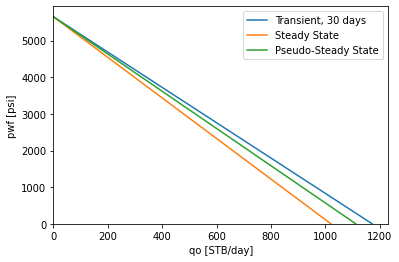

In [16]:
plt.plot(q_transt,prange,label='Transient, 30 days')
plt.plot(q_steady,prange,label='Steady State')
plt.plot(q_pseudo,prange,label='Pseudo-Steady State')

plt.xlabel("qo [STB/day]")
plt.ylabel("pwf [psi]")

plt.legend()

plt.xlim(xmin=0)
plt.ylim(ymin=0)

plt.show()

# Two-Phase Reservoirs

In [17]:
prange2 = np.array([5651,5000,4500,4000,3500,3000,2500,2000,1500,1000,500,0])

In [18]:
inflow.saturated(pres,pwf=prange2,model="vogel")

array([  0.        , 121.54913411, 205.99779407, 282.70792251,
       351.67951942, 412.91258479, 466.40711863, 512.16312094,
       550.18059172, 580.45953097, 602.99993869, 617.80181488])

In [19]:
inflow.saturated(pres,pwf=prange2,model="fetkovich",n=2)

array([  0.        ,  29.12666073,  82.70204591, 153.81076364,
       234.72853166, 318.6398068 , 399.63778498, 472.7244012 ,
       533.81032958, 579.71498328, 608.16651459, 617.80181488])

In [20]:
q_vogel = inflow.saturated(pres,pwf=prange,model="vogel")
q_fetkovich = inflow.saturated(pres,pwf=prange,model="fetkovich",n=2)

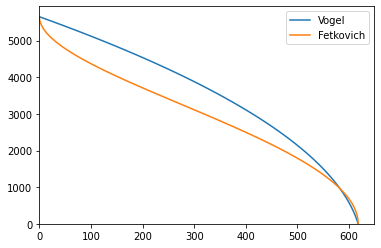

In [21]:
plt.plot(q_vogel,prange,label='Vogel')
plt.plot(q_fetkovich,prange,label='Fetkovich')

plt.legend()

plt.xlim(xmin=0)
plt.ylim(ymin=0)

plt.show()

# Partial Two-Phase Reservoirs

In [22]:
prange3 = np.array([0,565,1130,1695,2260,2826,3000,5651])

In [23]:
inflow.partial(3000,pres,pwf=prange3,model="vogel")

array([849.66061668, 828.00020007, 787.7266498 , 728.83996587,
       651.34014828, 555.04058466, 521.68230406,   0.        ])

In [24]:
q_vogel = inflow.partial(3000,pres,pwf=prange,model="vogel")

In [25]:
q_fetkovich = inflow.partial(3000,pres,pwf=prange,model="fetkovich",n=1.1,regime="pseudo")

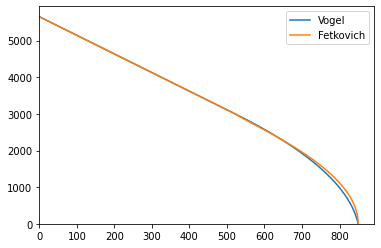

In [26]:
plt.plot(q_vogel,prange,label='Vogel')
plt.plot(q_fetkovich,prange,label='Fetkovich')

plt.legend()

plt.xlim(xmin=0)
plt.ylim(ymin=0)

plt.show()

# IPR Curves Using Test Points

## Vogel Equation

### Well A

In [27]:
PI = inflow.PI_vogel(3000,5000,300,4000)

In [28]:
PI

0.3

In [29]:
prange = np.array([0,500,1000,1500,2000,2500,3000,5000])

In [33]:
inflow.partial(3000,5000,prange,model="vogel",PI=PI)

array([1100.        , 1072.22222222, 1022.22222222,  950.        ,
        855.55555556,  738.88888889,  600.        ,    0.        ])

In [34]:
prange = np.linspace(0,5000)

In [35]:
q = inflow.partial(3000,5000,prange,model="vogel",PI=PI)

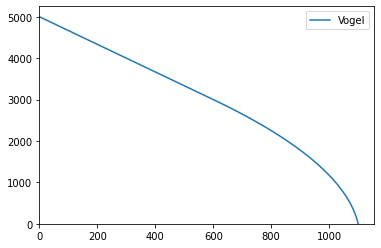

In [36]:
plt.plot(q,prange,label='Vogel')

plt.legend()

plt.xlim(xmin=0)
plt.ylim(ymin=0)

plt.show()

### Well B

In [37]:
PI = inflow.PI_vogel(3000,5000,900,2000)

In [38]:
PI

0.3155844155844156

In [41]:
prange = np.array([0,500,1000,1500,2000,2500,3000,5000])

In [42]:
q = inflow.partial(3000,5000,prange,model="vogel",PI=PI)

In [43]:
q

array([1157.14285714, 1127.92207792, 1075.32467532,  999.35064935,
        900.        ,  777.27272727,  631.16883117,    0.        ])

## Fetkovich Equation

In [44]:
# reservoir pressure 3,000 psia
# Tested flowing bottom-hole pressure, pwf1 = 2000 psia
# Tested production rate at pwf1, q1 = 500 stb/day
# Tested flowing bottom-hole pressure, pwf2 = 1000 psia
# Tested production rate at pwf2, q2 = 800 stb/day

In [45]:
prange = np.array([0,500,1000,1500,2000,2500,3000])

In [46]:
PI1 = inflow.PI_vogel(3000,3000,500,2000)

In [47]:
PI1

0.5869565217391305

In [48]:
inflow.partial(3000,3000,prange,model="vogel",PI=PI1)

array([978.26086957, 923.91304348, 826.08695652, 684.7826087 ,
       500.        , 271.73913043,   0.        ])

In [49]:
PI2,n = inflow.PI_fetkovich(3000,3000,500,800,2000,1000)

In [50]:
PI2,n

(0.54, 1.0)

In [51]:
inflow.partial(3000,3000,prange,model="fetkovich",n=n,PI=PI2)

array([900., 875., 800., 675., 500., 275.,   0.])

In [52]:
prange = np.linspace(0,3000)

In [53]:
q1 = inflow.partial(3000,3000,prange,model="vogel",PI=PI1)
q2 = inflow.partial(3000,3000,prange,model="fetkovich",n=n,PI=PI2)

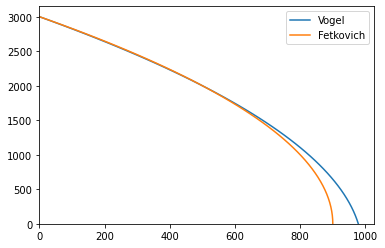

In [54]:
plt.plot(q1,prange,label='Vogel')
plt.plot(q2,prange,label='Fetkovich')

plt.legend()

plt.xlim(xmin=0)
plt.ylim(ymin=0)

plt.show()

# Composite IPR Model